# Introducción a Gradient Boosting de Árboles

En este notebook aprenderás:
1. Cómo funciona el algoritmo de **Gradient Boosting** paso a paso.
2. Ventajas de usarlo en datos tabulares.
3. Un ejemplo práctico con datos sintéticos.


## Explicación del Modelo

Gradient Boosting construye un modelo fuerte a partir de muchos **árboles débiles**:

1. **Inicialización**:  
   $$F_0(x) = \text{mediana}(y)$$

2. **Iteraciones**:  
   Para $m = 1, 2, \dots, M$:
   - Calcula los residuales  
     $r_i^{(m)} = y_i - F_{m-1}(x_i)$
   - Ajusta un árbol débil `f_m(x)` para predecir $r_i^{(m)}$.
   - Actualiza el ensamblado:  
     \[F_m(x) = F_{m-1}(x) + \eta \, f_m(x)\]  
     donde $\eta$ es el **learning rate**.

3. **Regularización integrada**:  
   - `num_leaves` / `max_leaf_nodes`: complejidad de cada árbol.  
   - `min_data_in_leaf`: evita hojas con pocas muestras.  
   - `lambda_l1`, `lambda_l2`: penalización L1/L2.

4. **Ventajas**:
   - Manejo natural de valores faltantes y datos heterogéneos.  
   - Captura relaciones no lineales e interacciones.  
   - Eficiente y probado en tareas de regresión tabular.


In [43]:
# 1. Importar librerías
import numpy as np
import pandas as pd
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Para mostrarlos inline
%matplotlib inline

In [44]:
# 2. Generar datos sintéticos
np.random.seed(0)

X = pd.DataFrame({
    'feat_0': np.random.rand(50) * 10,
    'feat_1': np.random.rand(50) * 5 + 1,
    'feat_2': np.random.rand(50) * 20 - 10
})
y = 2*X['feat_0'] - X['feat_1'] + 0.5*X['feat_2'] + np.random.randn(50)

X.head()

,feat_0,feat_1,feat_2
0,5.488135,3.850984,3.556331
1,7.151894,3.193008,-4.599841
2,6.027634,5.941869,4.703880
3,5.448832,1.510224,9.243771
4,4.236548,2.044384,-5.024937


In [45]:
# 3. Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

print(f"Entrenamiento: {X_train.shape}, Prueba: {X_test.shape}")

Entrenamiento: (40, 3), Prueba: (10, 3)


In [46]:
# 4. Entrenar el modelo
model = HistGradientBoostingRegressor(
    loss='squared_error',
    learning_rate=0.1,
    max_leaf_nodes=10,
    max_iter=100
)
model.fit(X_train, y_train)

,loss,'squared_error'
,quantile,None
,learning_rate,0.1
,max_iter,100
,max_leaf_nodes,10
,max_depth,None
,min_samples_leaf,20
,l2_regularization,0.0
,max_features,1.0
,max_bins,255
,categorical_features,'from_dtype'


In [47]:
# 5. Predicción y evaluación
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = model.predict(X_test)
mse    = mean_squared_error(y_test, y_pred)  # calcula MSE
rmse   = np.sqrt(mse)                        # luego la raíz cuadrada para RMSE
print(f"RMSE en test: {rmse:.3f}")

RMSE en test: 3.738


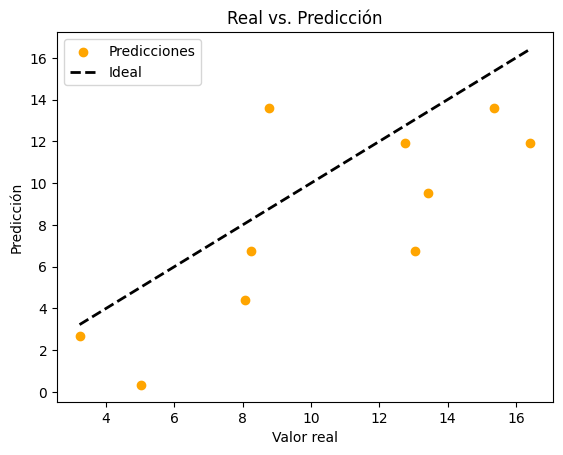

In [48]:
# 6. Visualizar real vs predicción
plt.scatter(y_test, y_pred, color='orange', label='Predicciones')
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'k--', lw=2, label='Ideal')
plt.xlabel("Valor real")
plt.ylabel("Predicción")
plt.title("Real vs. Predicción")
plt.legend()
plt.show()